# Exercise 1: Introduction to image manipulation using Python

## 1.  Install dependencies if needed 

Run the commands below to install the dependencies

In [1]:
!pip install -q pillow matplotlib scikit-image scikit-learn

## 2. Read images

- Download the Sentinel-2 images from [here](https://drive.google.com/file/d/1oPmyt6jvYrSge2N_uJHRDPIfWWXVGC6a/view?usp=sharing). 
- Place the downloaded .zip file to the same folder as this notebook

In [1]:
import zipfile
import os

with zipfile.ZipFile("image_week1_tif.zip", 'r') as zip_ref:
    zip_ref.extractall()
    
print(os.listdir("image_week1_tif"))

['band8.tif', 'band4.tif', 'band2.tif', 'band3.tif']


Read the images using the function ***imread*** of the ***skimage*** library

In [3]:
from skimage.io import imread, imsave
import numpy as np

# TODO: Use the library skimage to read the images
band2_array = imread("image_week1_tif/band2.tif")
band3_array = imread("image_week1_tif/band3.tif")
band4_array = imread("image_week1_tif/band4.tif")
band8_array = imread("image_week1_tif/band8.tif")

## 3. Save multi-band images on tif files, and visualize them

Use the function below to save, in ***tif*** files, the following images:
- Natural color image
- False color composite image 
    - Near infrared → Red
    - Red → Green
    - Green → Blue

In [4]:
def save_multiband_image_using_skimage(output_path, 
                         red_arr, green_arr, blue_arr):
    """
    Save image with 3 bands, in a .tif file
    
    Parameters
    ==================
    output_path: str
        Output file path with .tif extension
    red_arr: 2D numpy array
        Numpy array for the red band
    green_arr: 2D numpy array
        Numpy array for the green band
    blue_arr: 2D numpy array
        Numpy array for the blue band
    """
    
    multi_band_arr = np.array([red_arr, green_arr, blue_arr])
    multi_band_arr = multi_band_arr.transpose(1, 2, 0)
    imsave(output_path, multi_band_arr)

    
# TODO: Save natural color image using the function save_multiband_image
save_multiband_image_using_skimage("ex1_multiband_natural_color.tif",
                    band4_array, band3_array, band2_array)

# TODO: Save the false color composite image using the function save_multiband_image
save_multiband_image_using_skimage("ex1_multiband_false_color.tif",
                    band8_array, band4_array, band3_array)

/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: ex1_multiband_natural_color.tif is a low contrast image
/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: ex1_multiband_false_color.tif is a low contrast image


Visualize the images using the ***matplotlib*** (normalize them first)

In [5]:
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

def get_normalized_image(image, percentiles=(2, 98)):
    """
    Rescale image to values between 0 to 255 (capping outlier values) 
    
    Parameters
    ==================
    image: Numpy array
        Image numpy array with shape (height, width, num_bands)
    
    percentiles: tuple
        Tuple of min and max percentiles to cap outlier values
    
    Returns
    ==================
    output: Numpy array
        Normalized image numpy array
    
    """
    output = np.zeros_like(image)
    for k in range(image.shape[2]): # for each band
        p_min, p_max = np.percentile(image[:, :, k], percentiles)
        output[:, :, k] = exposure.rescale_intensity(image[:, :, k], 
                            in_range=(p_min, p_max), out_range=(0, 255))
    return output.astype(np.uint8)

# TODO: Read the images you saved before and get numpy arrays
natural_color_arr = imread("ex1_multiband_natural_color.tif")
false_color_composite_arr = imread("ex1_multiband_false_color.tif")

# TODO: normalize images for visualization
natural_color_arr_norm = get_normalized_image(natural_color_arr)
false_color_composite_arr_norm = get_normalized_image(false_color_composite_arr)

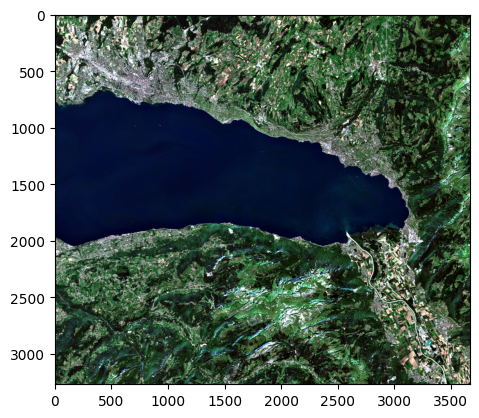

In [6]:
# TODO: visualize natural color image using matplotlib 
#       Note: before calling plt.imshow() 
#             you can change the size of the visualized image using the command 
#             plt.figure(figsize = (6,6)) 
#             use the value of figsize that you prefer
plt.imshow(natural_color_arr_norm)

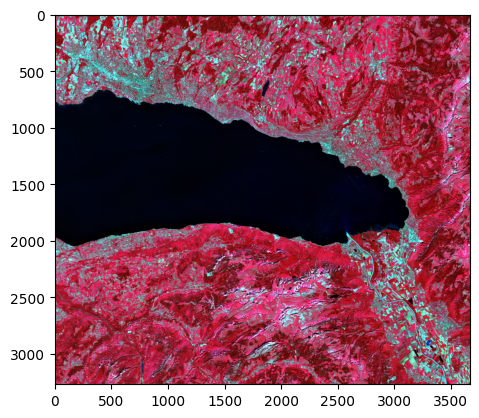

In [7]:
# TODO: visualize false color composite image using matplotlib 
plt.imshow(false_color_composite_arr_norm)

## 4. Crop images using bounding boxes

Crop the natural color image, and the false composite color image, using the following bounding boxes (in pixel coordinates)
- Region 1 → ***y_min***: 2500, ***x_min***: 3090, ***y_max***: 2590, ***x_max*** 3180
- Region 2 → ***y_min***: 920,  ***x_min***: 1830, ***y_max***: 1120, ***x_max*** 2030

In [8]:
# Remember to Run the cell that contains the function implementation before calling it
def crop_and_save_image(image_array, 
                        y_min, x_min, y_max, x_max, 
                        output_path):
    
    """
    Save a crop of the image delimited by bounding box coordinates
    and returns the numpy array of the cropped image, with shape (height, width, num_bands) 
    
    Parameters
    ==================
    image_array: str
        Image array
    y_min: int
        Minimum vertical coordinate of the bounding box
    x_min: int
        Minimum horizontal coordinate of the bounding box
    y_max: int
        Maximum vertical coordinate of the bounding box
    x_max: int
        Maximum horizontal coordinate of the bounding box
    output_path: str
        Output file path, with extension .tif
    
    Returns
    ==================
    out_image:
        Numpy array of the cropped image, with shape (height, width, num_bands)
    
    """
    
    cropped_image_array = image_array[y_min:y_max+1, x_min:x_max+1]
    
    imsave(output_path, cropped_image_array)
    
    return cropped_image_array

In [9]:
# Bounding box coordinates of the Region 1 (pixel coordinates)
region1_y_min = 2490
region1_x_min = 3090
region1_y_max = 2590
region1_x_max = 3190

# TODO: Use the function crop_and_save_image (defined above) to crop the Region 1,
#       in the natural color image, and the false color composite image,
#       using the bounding box coordinates defined above
region_1_natural_color_arr = crop_and_save_image(natural_color_arr,
                   region1_y_min, region1_x_min, region1_y_max, region1_x_max,
                   "ex1_region_1_multiband_natural_color.tif")
region_1_false_composite_color_arr = crop_and_save_image(false_color_composite_arr,
                   region1_y_min, region1_x_min, region1_y_max, region1_x_max,
                   "ex1_region_1_multiband_false_color.tif")

/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: ex1_region_1_multiband_natural_color.tif is a low contrast image
/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: ex1_region_1_multiband_false_color.tif is a low contrast image


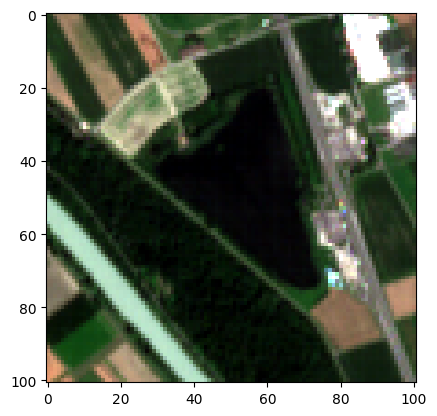

In [10]:
# TODO: Visualize Region 1 in natural color
plt.imshow(get_normalized_image(region_1_natural_color_arr))

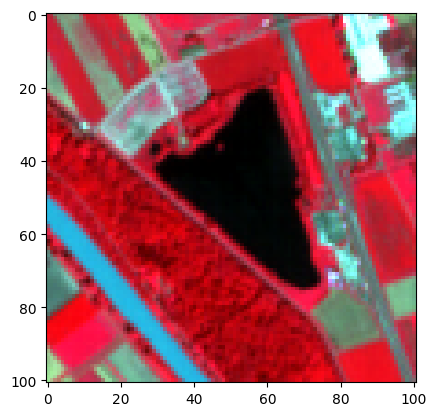

In [11]:
# TODO: Visualize Region 1 in false color composite
plt.imshow(get_normalized_image(region_1_false_composite_color_arr))

In [12]:
# Bounding box coordinates of the Region 2 (pixel coordinates)
region2_y_min = 920
region2_x_min = 1830
region2_y_max = 1120
region2_x_max = 2030

# TODO: Use the function crop_and_save_image (defined above) to crop the Region 2,
#       in the natural color image, and the false color composite image,
#       using the bounding box coordinates defined above
region_2_natural_color_arr = crop_and_save_image(natural_color_arr,
                   region2_y_min, region2_x_min, region2_y_max, region2_x_max,
                   "ex1_region_2_multiband_natural_color.tif")

region_2_false_composite_color_arr = crop_and_save_image(false_color_composite_arr,
                   region2_y_min, region2_x_min, region2_y_max, region2_x_max,
                   "ex1_region_2_multiband_false_color.tif")

/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: ex1_region_2_multiband_natural_color.tif is a low contrast image
/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: ex1_region_2_multiband_false_color.tif is a low contrast image


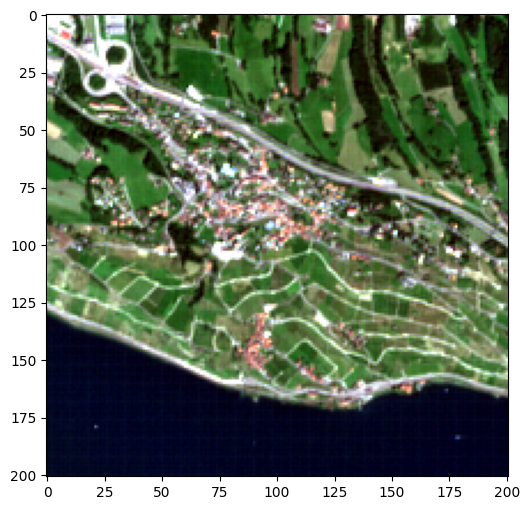

In [13]:
# TODO: Visualize Region 2 in natural color
plt.figure(figsize = (6,6))
plt.imshow(get_normalized_image(region_2_natural_color_arr))

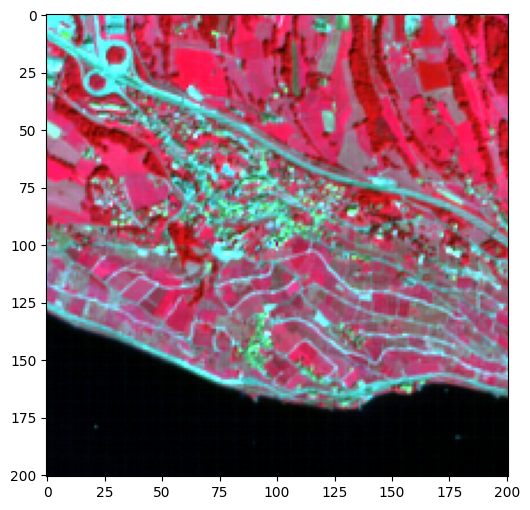

In [14]:
# TODO: Visualize Region 1 in false color composite
plt.figure(figsize = (6,6))
plt.imshow(get_normalized_image(region_2_false_composite_color_arr))

In [15]:
# TODO: Which is the shape of the numpy arrays of the two cropped regions?
print(region_1_natural_color_arr.shape)
print(region_2_natural_color_arr.shape)

(101, 101, 3)
(201, 201, 3)


In [16]:
# TODO: The spatial resolution of the images is 10m. 
#       What is the area in square meters covered by each of the two cropped regions?
print(region_1_natural_color_arr.shape[0]*region_1_natural_color_arr.shape[1]*10*10)
print(region_2_natural_color_arr.shape[0]*region_2_natural_color_arr.shape[1]*10*10)

1020100
4040100
